In [1]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
            print('Url: ', path)
            print('Raw data:', raw_path)
        else:
            print('Url: ', self.url)
            print('Raw data:', self.url)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os
        if os.path.exists(self.file_name): os.remove(self.file_name)
        else: print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        import time
        print(self.file_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [2]:
import numpy as np
import pandas as pd

import urllib.request, urllib.parse, urllib.error
import re
import os
import time
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
%matplotlib inline

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',1000)

In [4]:
FIG_size=(6,16) # figure size

# font size
TIT_size = 14    # titles
LAB_size = 13    # labels
LEG_size = 13    # legends
TCK_size = 12    # ticklabels

LIN_wei = 2.5    # line weights
BAR_wid = 4      # bar width

def setX_years(ax, ticks):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0],ticks[-1])
    ax.set_xticklabels(ticks, rotation=45, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Years', fontsize=LAB_size)
       
def setX_areas(ax, ticks):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Areas', fontsize=LAB_size)
    
def setY_num(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=LAB_size)
    
def setY_wei(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Prods Weight (10000 t)', fontsize=LAB_size)
    
def setY_per(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Percentage (%)', fontsize=LAB_size)

def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [6]:
# If you have not cloned the whole repository from  [Github](https://github.com/good-food/datamap2019)
# please use the next line in replace, remember to replace the argument with one path by imitating the following lines.
# df = ReadData(path).createDF()

# raw
spl_raw = pd.read_csv('./data/'+'food_supply'+'.csv')
blc_raw = pd.read_csv('./data/'+'food_balance'+'.csv')

## Food Supply of Livestock and Fish Primary Equivalent

In [7]:
spl_raw.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,CL,Food Supply - Livestock and Fish Primary Equivalent,41,"China, mainland",641,Food supply quantity (tonnes),2769,"Aquatic Animals, Others",1961,1961,tonnes,0.0,S,Standardized data
1,CL,Food Supply - Livestock and Fish Primary Equivalent,41,"China, mainland",641,Food supply quantity (tonnes),2769,"Aquatic Animals, Others",1962,1962,tonnes,0.0,S,Standardized data
2,CL,Food Supply - Livestock and Fish Primary Equivalent,41,"China, mainland",641,Food supply quantity (tonnes),2769,"Aquatic Animals, Others",1963,1963,tonnes,0.0,S,Standardized data
3,CL,Food Supply - Livestock and Fish Primary Equivalent,41,"China, mainland",641,Food supply quantity (tonnes),2769,"Aquatic Animals, Others",1964,1964,tonnes,0.0,S,Standardized data
4,CL,Food Supply - Livestock and Fish Primary Equivalent,41,"China, mainland",641,Food supply quantity (tonnes),2769,"Aquatic Animals, Others",1965,1965,tonnes,0.0,S,Standardized data


In [8]:
year_now = datetime.date.today().year
data_year = spl_raw.Year.max()
print(year_now)
print(data_year)

2019
2013


In [9]:
spl_raw.drop(columns = ['Domain Code', 'Country Code', 'Element Code', 'Item Code', 'Year Code', 'Flag'], inplace=True)
spl_raw.to_csv('./data/'+'food_supply'+'_temp.csv', index=False)

In [11]:
spl = pd.read_csv('./data/'+'food_supply'+'_temp.csv')
spl = spl.dropna()
spl = spl[~(spl == 0).any(axis=1)]
spl.head()

,Domain,Country,Element,Item,Year,Unit,Value,Flag Description
9,Food Supply - Livestock and Fish Primary Equivalent,"China, mainland",Food supply quantity (tonnes),"Aquatic Animals, Others",1970,tonnes,38000.0,Standardized data
10,Food Supply - Livestock and Fish Primary Equivalent,"China, mainland",Food supply quantity (tonnes),"Aquatic Animals, Others",1971,tonnes,1300.0,Standardized data
11,Food Supply - Livestock and Fish Primary Equivalent,"China, mainland",Food supply quantity (tonnes),"Aquatic Animals, Others",1972,tonnes,1400.0,Standardized data
12,Food Supply - Livestock and Fish Primary Equivalent,"China, mainland",Food supply quantity (tonnes),"Aquatic Animals, Others",1973,tonnes,49700.0,Standardized data
13,Food Supply - Livestock and Fish Primary Equivalent,"China, mainland",Food supply quantity (tonnes),"Aquatic Animals, Others",1974,tonnes,8568.0,Standardized data


In [14]:
# print('BEFORE selection')
# display(spl.groupby(['Element']).count())
# display(spl.groupby(['Item']).count())

spl = spl[spl['Element'].isin(['Food supply quantity (g/capita/day)', 
                                        'Protein supply quantity (g/capita/day)', 
                                        'Food supply quantity (tonnes)'])]

meat_offal = ['Pigmeat','Poultry Meat',
        'Bovine Meat','Mutton & Goat Meat',
        'Meat, Other','Offals, Edible']

egg_milk=['Milk - Excluding Butter','Eggs']

aquatic=['Freshwater Fish','Demersal Fish','Pelagic Fish','Marine Fish, Other',
         'Crustaceans','Molluscs, Other','Cephalopods',
         'Aquatic Plants']

spl = spl[spl['Item'].isin(meat_offal+egg_milk+aquatic)]

# print('AFTER selection')
display(spl.groupby(['Element', 'Item']).count())

Domain  \
Element                                Item                              
Food supply quantity (g/capita/day)    Aquatic Plants               53   
                                       Bovine Meat                  53   
                                       Cephalopods                  53   
                                       Crustaceans                  53   
                                       Demersal Fish                53   
                                       Eggs                         53   
                                       Freshwater Fish              53   
                                       Marine Fish, Other           53   
                                       Meat, Other                  53   
                                       Milk - Excluding Butter      53   
                                       Molluscs, Other              53   
                                       Mutton & Goat Meat           53   
                                       Offals, Edible               53   
                                       Pelagic Fish                 53   
                                       Pigmeat                      53   
                                       Poultry Meat                 53   
Food supply quantity (tonnes)          Aquatic Plants               53   
                                       Bovine Meat                  53   
                                       Cephalopods                  53   
                                       Crustaceans                  53   
                                       Demersal Fish                53   
                                       Eggs                         53   
                                       Freshwater Fish              53   
                                       Marine Fish, Other           53   
                                       Meat, Other                  53   
                                       Milk - Excluding Butter      53   
                                       Molluscs, Other              53   
                                       Mutton & Goat Meat           53   
                                       Offals, Edible               53   
                                       Pelagic Fish                 53   
                                       Pigmeat                      53   
                                       Poultry Meat                 53   
Protein supply quantity (g/capita/day) Aquatic Plants               53   
                                       Bovine Meat                  53   
                                       Cephalopods                  53   
                                       Crustaceans                  53   
                                       Demersal Fish                53   
                                       Eggs                         53   
                                       Freshwater Fish              53   
                                       Marine Fish, Other           53   
                                       Meat, Other                  53   
                                       Milk - Excluding Butter      53   
                                       Molluscs, Other              53   
                                       Mutton & Goat Meat           53   
                                       Offals, Edible               53   
                                       Pelagic Fish                 53   
                                       Pigmeat                      53   
                                       Poultry Meat                 53   

                                                                Country  Year  \
Element                                Item                                     
Food supply quantity (g/capita/day)    Aquatic Plants                53    53   
                                       Bovine Meat                   53    53   
                                       

In [15]:
print('Units BEFORE uniform')
display(spl.groupby(['Element', 'Unit']).count())

spl.loc[spl['Unit'] =='tonnes','Value']=spl['Value']/10000
spl.loc[spl['Unit']=='tonnes', 'Unit']= '10000 tonnes'

print('Units AFTER uniform')
display(spl.groupby(['Element', 'Unit']).count())

Units BEFORE uniform


,,Domain,Country,Item,Year,Value,Flag Description
Element,Unit,,,,,,
Food supply quantity (g/capita/day),g/capita/day,848,848,848,848,848,848
Food supply quantity (tonnes),tonnes,848,848,848,848,848,848
Protein supply quantity (g/capita/day),g/capita/day,848,848,848,848,848,848


Units AFTER uniform


,,Domain,Country,Item,Year,Value,Flag Description
Element,Unit,,,,,,
Food supply quantity (g/capita/day),g/capita/day,848,848,848,848,848,848
Food supply quantity (tonnes),10000 tonnes,848,848,848,848,848,848
Protein supply quantity (g/capita/day),g/capita/day,848,848,848,848,848,848


In [17]:
spl.to_csv('./data/'+'food_supply'+'_temp.csv', index=False)

In [18]:
def plotLine(dfs, items):
    for n in range(0, len(items)):
        dfs[items[n]].plot.line(x='Year', c=CLs[n], ls=LSs[n], lw=LIN_wei, ax=ax0)
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
def plotBar(dfs, items):
    plt.bar(years, np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value']),color=CLs[0], width=BAR_wid)
    bot=np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])
    for n in range(1, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value']),bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])

    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
    return bot

def plotStackBar(dfs, items):
    year_total
    plt.bar(years, np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])/year_total,color=CLs[0], width=BAR_wid)
    bot=np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])/year_total
    for n in range(1, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total,bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
               bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)

### Food Supply Quantity (tonnes)

In [ ]:
spl = pd.read_csv('./data/'+'food_supply'+'_temp.csv')

# years for ploting charts
years = list(range(1965,2015,5))
Xs = range(1960, 2020, 5)

spl=spl_raw
tonnes = spl[(spl['Element']=='Food supply quantity (tonnes)')][['Year','Item','Value']]

In [20]:
CLs = ('darkgrey', 'r','b','y','c','g','m', 'k')    # clors
LSs = ('-', '--', ':', '-.', '-', '--', ':', '-.')  # linestyles

#### Meat

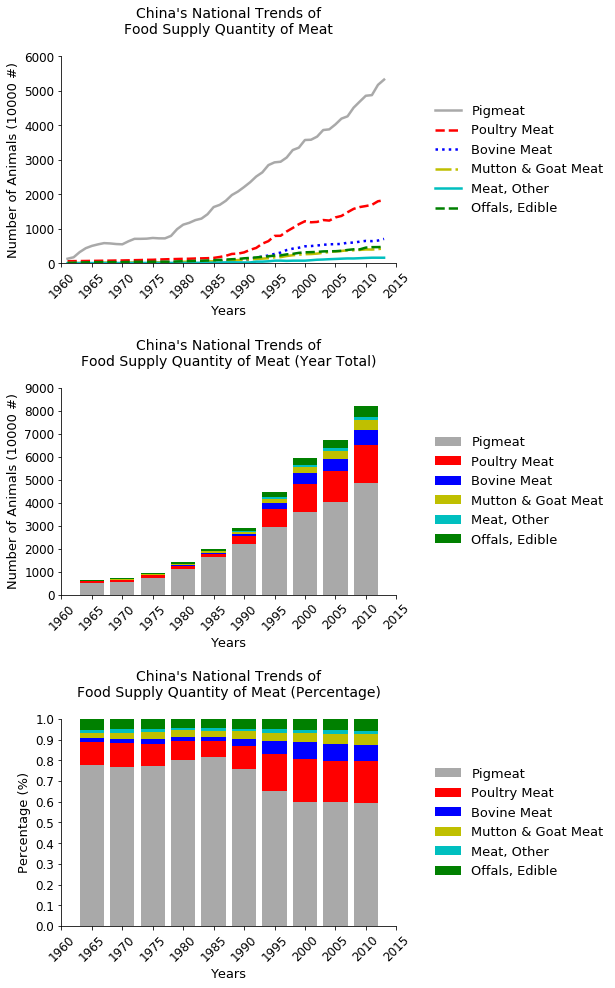

In [21]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Food Supply Quantity of Meat'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = meat_offal
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = tonnes[tonnes['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 7000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 10000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

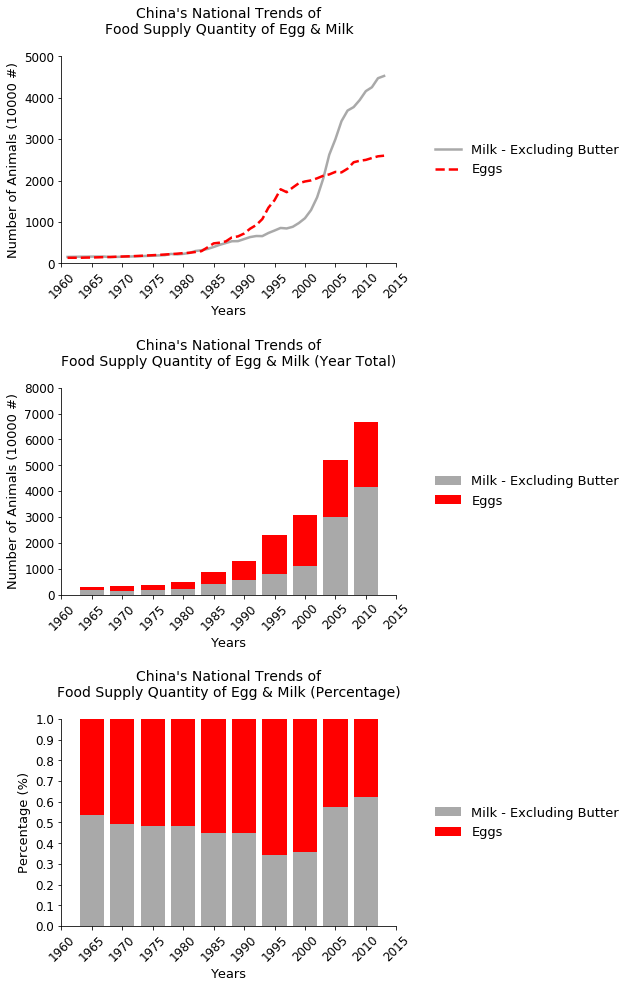

In [22]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Food Supply Quantity of Egg & Milk'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = egg_milk
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = tonnes[tonnes['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 6000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 9000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

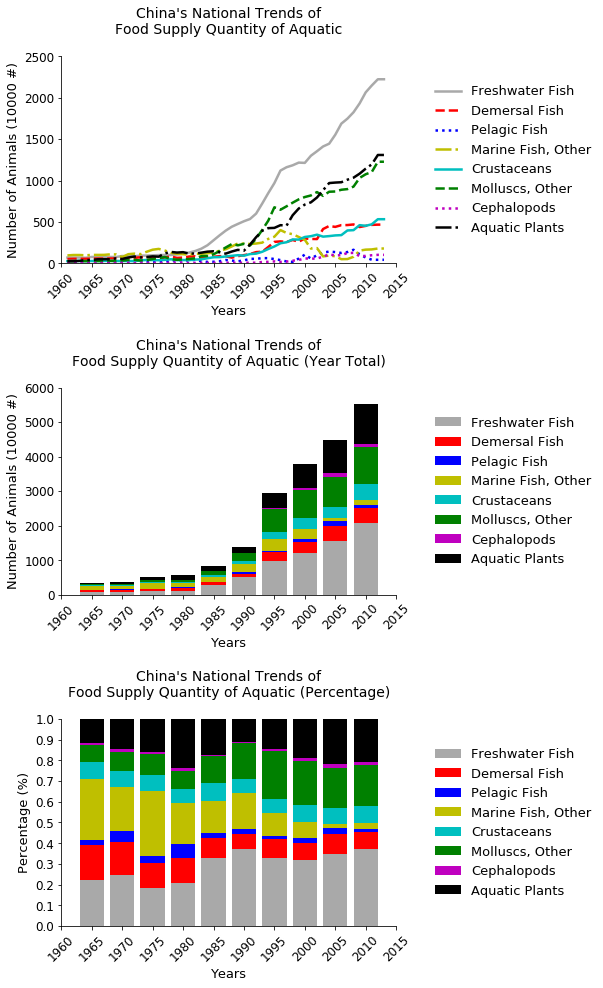

In [23]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Food Supply Quantity of Aquatic'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = aquatic
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = tonnes[tonnes['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 3000, 500))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 7000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

## Food Commodity Balances of Livestock and Fish Primary Equivalent

In [24]:
blc_raw.drop(columns = ['Domain Code', 'Country Code', 'Element Code', 'Item Code', 'Year Code', 'Flag'], inplace=True)
blc_raw.to_csv('./data/'+'food_balance'+'_temp.csv', index=False)

In [25]:
blc = pd.read_csv('./data/'+'food_balance'+'_temp.csv')
blc = blc.dropna()
blc = blc[~(blc == 0).any(axis=1)]
blc.head()

,Domain,Country,Element,Item,Year,Unit,Value,Flag Description
9,Commodity Balances - Livestock and Fish Primary Equivalent,"China, mainland",Production,"Aquatic Animals, Others",1970,tonnes,50600,Standardized data
10,Commodity Balances - Livestock and Fish Primary Equivalent,"China, mainland",Production,"Aquatic Animals, Others",1971,tonnes,16000,Standardized data
11,Commodity Balances - Livestock and Fish Primary Equivalent,"China, mainland",Production,"Aquatic Animals, Others",1972,tonnes,16600,Standardized data
12,Commodity Balances - Livestock and Fish Primary Equivalent,"China, mainland",Production,"Aquatic Animals, Others",1973,tonnes,58200,Standardized data
13,Commodity Balances - Livestock and Fish Primary Equivalent,"China, mainland",Production,"Aquatic Animals, Others",1974,tonnes,22068,Standardized data


In [27]:
print('BEFORE selection')
display(blc.groupby(['Element']).count())
display(blc.groupby(['Item']).count())


meat_offal = ['Pigmeat','Poultry Meat',
        'Bovine Meat','Mutton & Goat Meat',
        'Meat, Other','Offals, Edible']

egg_milk=['Milk - Excluding Butter','Eggs']

aquatic=['Freshwater Fish','Demersal Fish','Pelagic Fish','Marine Fish, Other',
         'Crustaceans','Molluscs, Other','Cephalopods',
         'Aquatic Plants']

blc = blc[blc['Item'].isin(meat_offal+egg_milk+aquatic)]

# print('AFTER selection')
display(blc.groupby(['Element']).count())
display(blc.groupby(['Item']).count())
display(blc.groupby(['Element', 'Item']).count())

BEFORE selection


,Domain,Country,Item,Year,Unit,Value,Flag Description
Element,,,,,,,
Export Quantity,1317,1317,1317,1317,1317,1317,1317
Import Quantity,1019,1019,1019,1019,1019,1019,1019
Production,1492,1492,1492,1492,1492,1492,1492


,Domain,Country,Element,Year,Unit,Value,Flag Description
Item,,,,,,,
"Aquatic Animals, Others",101,101,101,101,101,101,101
Aquatic Plants,93,93,93,93,93,93,93
Bovine Meat,124,124,124,124,124,124,124
"Butter, Ghee",120,120,120,120,120,120,120
Cephalopods,125,125,125,125,125,125,125
Cheese,108,108,108,108,108,108,108
Cream,45,45,45,45,45,45,45
Crustaceans,133,133,133,133,133,133,133
Demersal Fish,102,102,102,102,102,102,102


,Domain,Country,Item,Year,Unit,Value,Flag Description
Element,,,,,,,
Export Quantity,698,698,698,698,698,698,698
Import Quantity,486,486,486,486,486,486,486
Production,848,848,848,848,848,848,848


,Domain,Country,Element,Year,Unit,Value,Flag Description
Item,,,,,,,
Aquatic Plants,93,93,93,93,93,93,93
Bovine Meat,124,124,124,124,124,124,124
Cephalopods,125,125,125,125,125,125,125
Crustaceans,133,133,133,133,133,133,133
Demersal Fish,102,102,102,102,102,102,102
Eggs,134,134,134,134,134,134,134
Freshwater Fish,118,118,118,118,118,118,118
"Marine Fish, Other",134,134,134,134,134,134,134
"Meat, Other",138,138,138,138,138,138,138


Domain  Country  Year  Unit  Value  \
Element         Item                                                          
Export Quantity Aquatic Plants               20       20    20    20     20   
                Bovine Meat                  43       43    43    43     43   
                Cephalopods                  42       42    42    42     42   
                Crustaceans                  50       50    50    50     50   
                Demersal Fish                23       23    23    23     23   
                Eggs                         53       53    53    53     53   
                Freshwater Fish              39       39    39    39     39   
                Marine Fish, Other           50       50    50    50     50   
                Meat, Other                  53       53    53    53     53   
                Milk - Excluding Butter      51       51    51    51     51   
                Molluscs, Other              42       42    42    42     42   
                Mutton & Goat Meat           43       43    43    43     43   
                Offals, Edible               53       53    53    53     53   
                Pelagic Fish                 30       30    30    30     30   
                Pigmeat                      53       53    53    53     53   
                Poultry Meat                 53       53    53    53     53   
Import Quantity Aquatic Plants               20       20    20    20     20   
                Bovine Meat                  28       28    28    28     28   
                Cephalopods                  30       30    30    30     30   
                Crustaceans                  30       30    30    30     30   
                Demersal Fish                26       26    26    26     26   
                Eggs                         28       28    28    28     28   
                Freshwater Fish              26       26    26    26     26   
                Marine Fish, Other           31       31    31    31     31   
                Meat, Other                  32       32    32    32     32   
                Milk - Excluding Butter      48       48    48    48     48   
                Molluscs, Other              27       27    27    27     27   
                Mutton & Goat Meat           32       32    32    32     32   
                Offals, Edible               28       28    28    28     28   
                Pelagic Fish                 38       38    38    38     38   
                Pigmeat                      30       30    30    30     30   
                Poultry Meat                 32       32    32    32     32   
Production      Aquatic Plants               53       53    53    53     53   
                Bovine Meat                  53       53    53    53     53   
                Cephalopods                  53       53    53    53     53   
                Crustaceans                  53       53    53    53     53   
                Demersal Fish                53       53    53    53     53   
                Eggs                         53       53    53    53     53   
                Freshwater Fish              53       53    53    53     53   
                Marine Fish, Other           53       53    53    53     53   
                Meat, Other                  53       53    53    53     53   
                Milk - Excluding Butter      53       53    53    53     53   
                Molluscs, Other              53       53    53    53     53   
                Mutton & Goat Meat           53       53    53    53     53   
                Offals, Edible               53       53    53    53     53   
                Pelagic Fish                 53       53    53    53     53   
                Pigmeat                      53       53    53    53     53   
                Poultry Meat                 53       53    53    53     53   

                                         Flag Description  
Element         Item          

In [35]:
blc=blc_raw

print('Units BEFORE uniform')
display(blc.groupby(['Element', 'Unit']).count())

blc.loc[blc['Unit'] =='tonnes','Value']=blc['Value']/10000
blc.loc[blc['Unit']=='tonnes', 'Unit']= '10000 tonnes'

print('Units AFTER uniform')
display(blc.groupby(['Element', 'Unit']).count())

Units BEFORE uniform


,,Domain,Country,Item,Year,Value,Flag Description
Element,Unit,,,,,,
Export Quantity,tonnes,1696,1696,1696,1696,1696,1696
Import Quantity,tonnes,1696,1696,1696,1696,1696,1696
Production,tonnes,1590,1590,1590,1590,1590,1590


Units AFTER uniform


,,Domain,Country,Item,Year,Value,Flag Description
Element,Unit,,,,,,
Export Quantity,10000 tonnes,1696,1696,1696,1696,1696,1696
Import Quantity,10000 tonnes,1696,1696,1696,1696,1696,1696
Production,10000 tonnes,1590,1590,1590,1590,1590,1590


### Export Quantity

In [36]:
ept = blc[(blc['Element']=='Export Quantity')][['Year','Item','Value']]

#### Meat

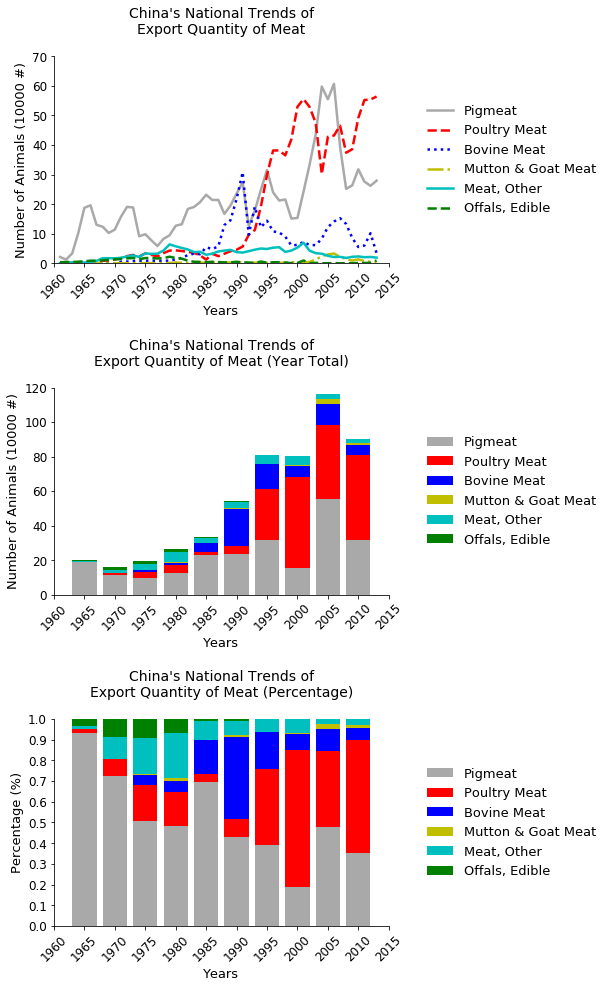

In [39]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Export Quantity of Meat'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = meat_offal
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ept[ept['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 80, 10))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 140, 20))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Egg & Milk

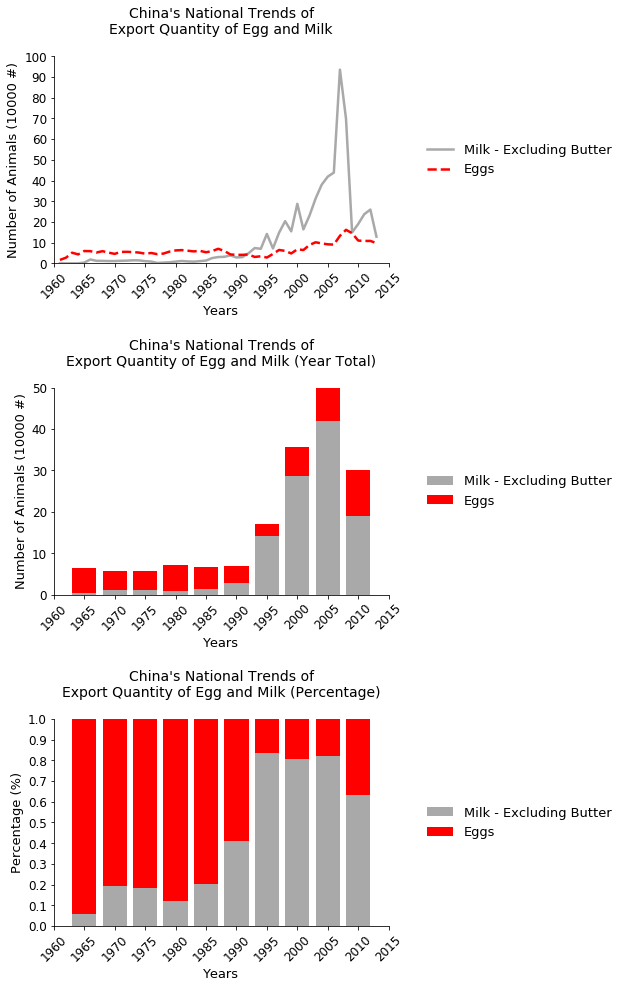

In [42]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Export Quantity of Egg and Milk'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = egg_milk
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ept[ept['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 110, 10))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 60, 10))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Aquatic

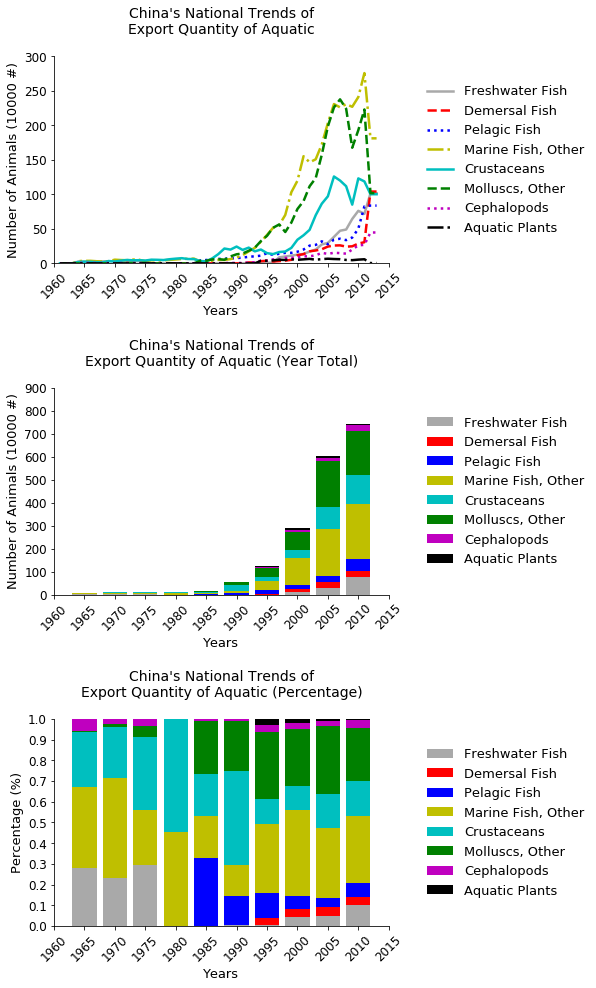

In [46]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Export Quantity of Aquatic'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = aquatic
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ept[ept['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 350, 50))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 1000, 100))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

### Import Quantity

In [48]:
ipt = blc[(blc['Element']=='Import Quantity')][['Year','Item','Value']]

#### Meat

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


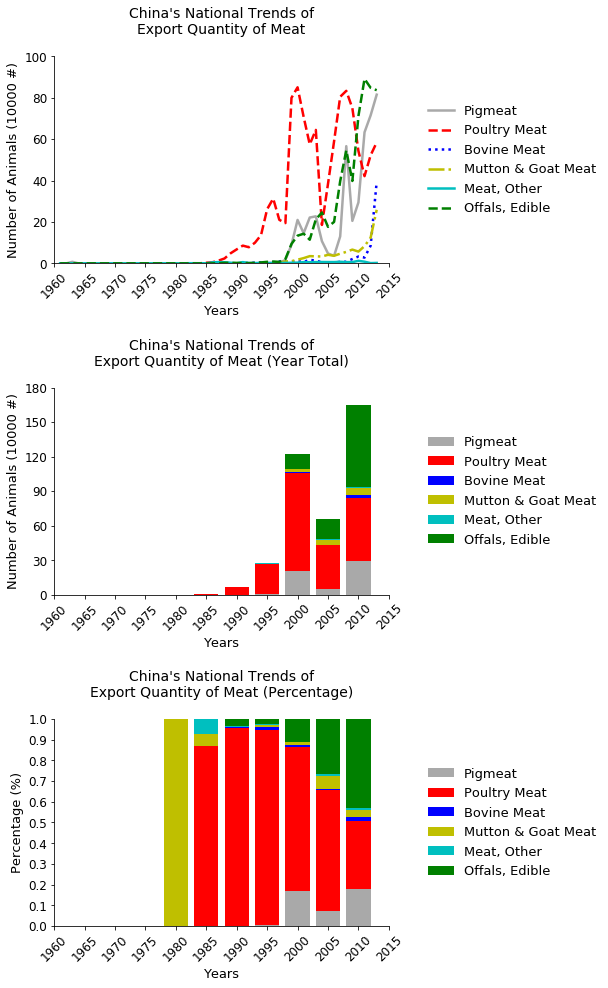

In [51]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Import Quantity of Meat'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = meat_offal
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ipt[ipt['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 120, 20))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 210, 30))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Egg & Milk

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


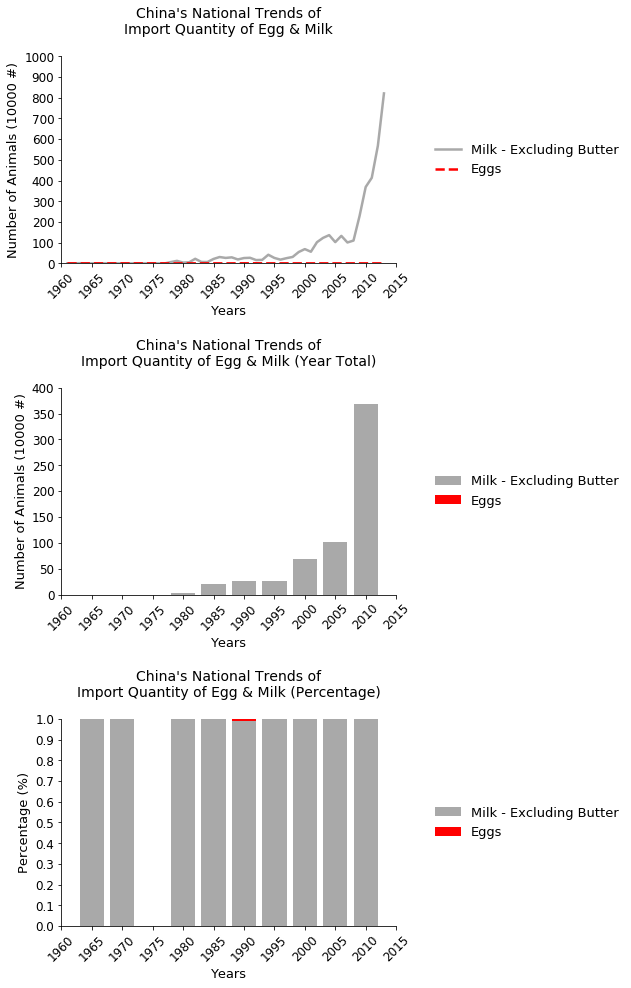

In [68]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Import Quantity of Egg & Milk'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = egg_milk
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ipt[ipt['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 1100, 100))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 450, 50))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Aquatic

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


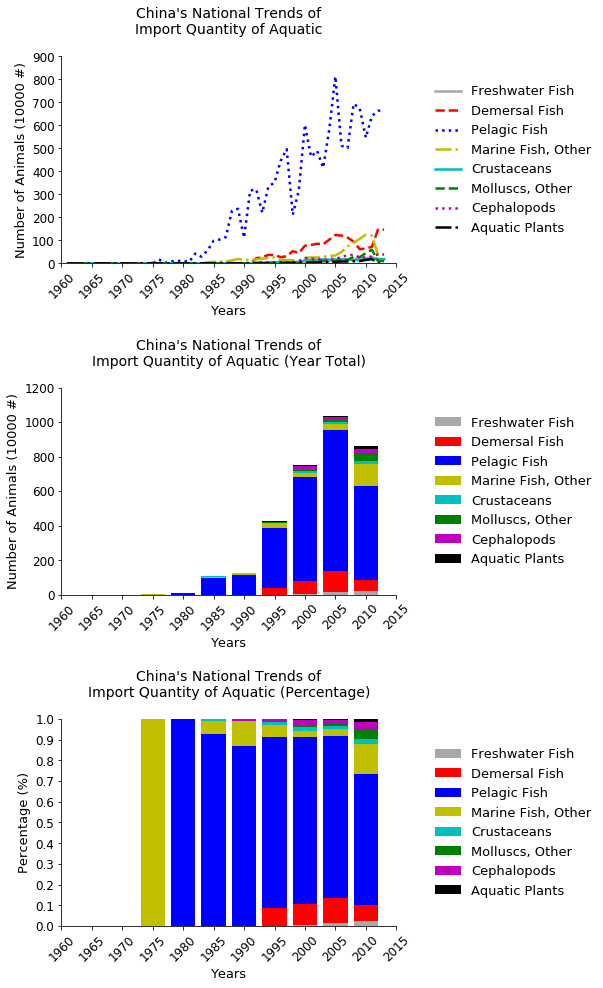

In [59]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Import Quantity of Aquatic'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = aquatic
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = ipt[ipt['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 1000, 100))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 1400, 200))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

Export: poultry meat, pigmeat, 